In [11]:
import os
import pandas as pd
import openpyxl
import numpy as np
import matplotlib.pyplot as plt

## Preprocessing

In [4]:
dfs = []
for file in os.listdir("data/reservations"):
    if not file.endswith(".xlsx"):
        continue
        
    print(file)
    dfs.append(pd.read_excel('data/reservations/' + file))

orders_df = pd.concat(dfs, ignore_index=True)

jan-march2024.xlsx
all reservations may 2022.xlsx
all res July - Sept 2023.xlsx
jul - dec 2022.xlsx
all reservations March 2022.xlsx
all res April - June 2023.xlsx
All reservations April 2022.xlsx
all reservations January 2022.xlsx
all res jan - march 2023.xlsx
all res Oct - Dec 2023.xlsx
all reservations June 2022.xlsx
All reservations February 2022.xlsx


In [5]:
orders_df.sort_values(by=['Dt. Checkin'], ascending=True, inplace=True)
orders_df.head()

,Dt. Inc,Facility,Reservation,Customer,Email,Email Check,Price,Days Parked,Dt. Checkin,Dt. Checkout,Status,Notes
271923,2021-12-24T07:04:05.73,Renaissance Newark Airport Hotel,8C15D2F3-7,Songtao,xst0912@gmail.com,NaN,44.19,8,2022-01-01T00:00:00,2022-01-08T19:00:00,P,NaN
271477,2021-12-14T21:54:59.813,Ft.Myers Airport Parking (NA),D3EA0390-6,Alicia,alikki1201@gmail.com,NaN,151.07,28,2022-01-01T01:00:00,2022-01-29T01:00:00,P,NaN
272651,2021-12-31T21:30:58.443,LAZ PARKING (Queens),F0B78F34-1,Samy,sallache65@gmail.com,NaN,87.49,5,2022-01-01T01:00:00,2022-01-05T21:30:00,P,NaN
272511,2021-12-30T23:37:09.29,Fine Airport Parking IAH- Covered Parking,3BD621EA-F,Rufiya,rufiyab@gmail.com,NaN,39.94,10,2022-01-01T02:00:00,2022-01-10T22:00:00,P,NaN
272654,2021-12-31T22:30:00.36,Fine Airport Parking IAH- Covered Parking,58E99414-B,Shereika,shereika87@gmail.com,NaN,29.45,7,2022-01-01T02:00:00,2022-01-08T01:00:00,P,NaN


In [6]:
reviews_df = pd.read_csv('data/reviews.csv', encoding='unicode_escape')
reviews_df = reviews_df.rename(columns={'Reservation Code': 'Reservation'})
reviews_df.head()

,Dt. Review,Member,Approved,Approved2,Grade,Comment,Rate,Points,Facility Name,Reservation,Action
0,2022-01-05T08:39:44,Marnita E.,1.0,1.0,5.0,PARKING IS ALWAYS GREAT HERE!!!,5.0,NaN,Hilton St. Louis Airport,19AEC798-0,26630
1,2022-01-08T12:32:20,Daphne B.,1.0,1.0,5.0,always a great experience,5.0,NaN,Jiffy Parking,5EB19558-6,26631
2,2022-01-08T20:20:47,Shabnam E.,1.0,1.0,5.0,Great!,5.0,NaN,Comfort Inn & Suites Boston Logan Internationa...,1F42056C-C,26632
3,2022-01-09T20:17:41,Abhilash N.,1.0,1.0,5.0,Excellent,5.0,NaN,Renaissance Newark Airport Hotel,AC206837-C,26633
4,2022-01-11T17:36:47,Lucy L.,1.0,1.0,5.0,"2nd time, great again!",5.0,NaN,Jiffy Parking,424CB064-1,26634


In [7]:
df = orders_df.merge(reviews_df, on='Reservation', how='left')
df['Dt. Checkin'] = pd.to_datetime(df['Dt. Checkin'])
df['Dt. Checkout'] = pd.to_datetime(df['Dt. Checkout'])
df['Dt. Inc'] = pd.to_datetime(df['Dt. Inc'], format='mixed')
df.head()

,Dt. Inc,Facility,Reservation,Customer,Email,Email Check,Price,Days Parked,Dt. Checkin,Dt. Checkout,...,Dt. Review,Member,Approved,Approved2,Grade,Comment,Rate,Points,Facility Name,Action
0,2021-12-24 07:04:05.730,Renaissance Newark Airport Hotel,8C15D2F3-7,Songtao,xst0912@gmail.com,NaN,44.19,8,2022-01-01 00:00:00,2022-01-08 19:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-12-14 21:54:59.813,Ft.Myers Airport Parking (NA),D3EA0390-6,Alicia,alikki1201@gmail.com,NaN,151.07,28,2022-01-01 01:00:00,2022-01-29 01:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-12-31 21:30:58.443,LAZ PARKING (Queens),F0B78F34-1,Samy,sallache65@gmail.com,NaN,87.49,5,2022-01-01 01:00:00,2022-01-05 21:30:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-12-30 23:37:09.290,Fine Airport Parking IAH- Covered Parking,3BD621EA-F,Rufiya,rufiyab@gmail.com,NaN,39.94,10,2022-01-01 02:00:00,2022-01-10 22:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-12-31 22:30:00.360,Fine Airport Parking IAH- Covered Parking,58E99414-B,Shereika,shereika87@gmail.com,NaN,29.45,7,2022-01-01 02:00:00,2022-01-08 01:00:00,...,2022-03-08T06:58:06,Shereika T.,1.0,1.0,5.0,great,5.0,NaN,Fine Airport Parking IAH- Covered Parking,27840.0


In [8]:
df.head()

,Dt. Inc,Facility,Reservation,Customer,Email,Email Check,Price,Days Parked,Dt. Checkin,Dt. Checkout,...,Dt. Review,Member,Approved,Approved2,Grade,Comment,Rate,Points,Facility Name,Action
0,2021-12-24 07:04:05.730,Renaissance Newark Airport Hotel,8C15D2F3-7,Songtao,xst0912@gmail.com,NaN,44.19,8,2022-01-01 00:00:00,2022-01-08 19:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-12-14 21:54:59.813,Ft.Myers Airport Parking (NA),D3EA0390-6,Alicia,alikki1201@gmail.com,NaN,151.07,28,2022-01-01 01:00:00,2022-01-29 01:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-12-31 21:30:58.443,LAZ PARKING (Queens),F0B78F34-1,Samy,sallache65@gmail.com,NaN,87.49,5,2022-01-01 01:00:00,2022-01-05 21:30:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-12-30 23:37:09.290,Fine Airport Parking IAH- Covered Parking,3BD621EA-F,Rufiya,rufiyab@gmail.com,NaN,39.94,10,2022-01-01 02:00:00,2022-01-10 22:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-12-31 22:30:00.360,Fine Airport Parking IAH- Covered Parking,58E99414-B,Shereika,shereika87@gmail.com,NaN,29.45,7,2022-01-01 02:00:00,2022-01-08 01:00:00,...,2022-03-08T06:58:06,Shereika T.,1.0,1.0,5.0,great,5.0,NaN,Fine Airport Parking IAH- Covered Parking,27840.0


In [22]:
# New customers per month
checkins_per_month = {}
used_names = {}

df['checkin_month_year'] = df['Dt. Checkin'].dt.strftime('%Y-%m')


for idx, row in df.iterrows():
    if row['Email'] in used_names:
        continue
    if str(row['checkin_month_year']) not in checkins_per_month:
        checkins_per_month[str(row['checkin_month_year'])] = []
    checkins_per_month[str(row['checkin_month_year'])].append(row['Email'])
    used_names[row['Email']] = None
    

In [23]:
df.head()

,Dt. Inc,Facility,Reservation,Customer,Email,Email Check,Price,Days Parked,Dt. Checkin,Dt. Checkout,...,Member,Approved,Approved2,Grade,Comment,Rate,Points,Facility Name,Action,checkin_month_year
0,2021-12-24 07:04:05.730,Renaissance Newark Airport Hotel,8C15D2F3-7,Songtao,xst0912@gmail.com,NaN,44.19,8,2022-01-01 00:00:00,2022-01-08 19:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-01
1,2021-12-14 21:54:59.813,Ft.Myers Airport Parking (NA),D3EA0390-6,Alicia,alikki1201@gmail.com,NaN,151.07,28,2022-01-01 01:00:00,2022-01-29 01:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-01
2,2021-12-31 21:30:58.443,LAZ PARKING (Queens),F0B78F34-1,Samy,sallache65@gmail.com,NaN,87.49,5,2022-01-01 01:00:00,2022-01-05 21:30:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-01
3,2021-12-30 23:37:09.290,Fine Airport Parking IAH- Covered Parking,3BD621EA-F,Rufiya,rufiyab@gmail.com,NaN,39.94,10,2022-01-01 02:00:00,2022-01-10 22:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-01
4,2021-12-31 22:30:00.360,Fine Airport Parking IAH- Covered Parking,58E99414-B,Shereika,shereika87@gmail.com,NaN,29.45,7,2022-01-01 02:00:00,2022-01-08 01:00:00,...,Shereika T.,1.0,1.0,5.0,great,5.0,NaN,Fine Airport Parking IAH- Covered Parking,27840.0,2022-01


Text(0, 0.5, 'Number of New Customers')

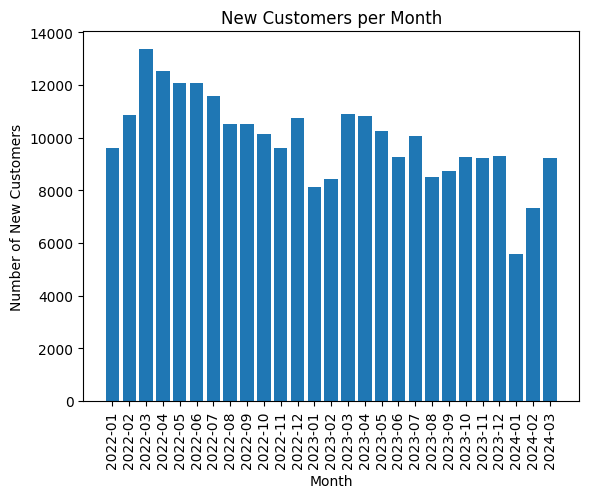

In [48]:
# New customers per month
total = 0
x = []
y = []
for key in checkins_per_month.keys():
    x.append(key)
    y.append(len(checkins_per_month[key]))
plt.bar(x, y)
plt.xticks(rotation=90)

plt.title("New Customers per Month")
plt.xlabel("Month")
plt.ylabel("Number of New Customers")

Text(0, 0.5, 'Return Rate (%)')

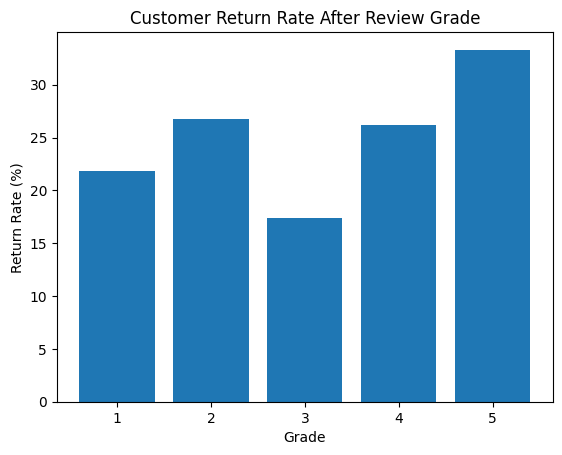

In [49]:
# Returning customer rate for each review rating
repeat_customers = {0: 0, 1.0: 0, 2.0: 0, 3.0: 0, 4.0: 0, 5.0: 0}
previous_orders = {}

for idx, row in df.iterrows():
    # If this is the users first order, add them to the existing users dict
    if row['Email'] not in previous_orders:
        previous_orders[row['Email']] = row['Grade']
        
    # If the user has made an order before, add one returning customer to their previous order review rating, and replace the previous rating with the current one
    else:
        if pd.isna(previous_orders[row['Email']]):
            repeat_customers[0] += 1
            previous_orders[row['Email']] = row['Grade']
        else:
            repeat_customers[previous_orders[row['Email']]] += 1
            previous_orders[row['Email']] = row['Grade']

x = []
y = []
for idx, row in pd.DataFrame(df.value_counts('Grade')).sort_values(by=['Grade']).iterrows():
    x.append(idx)
    y.append(repeat_customers[idx] / row['count'] * 100)
plt.bar(x, y)
plt.title("Customer Return Rate After Review Grade")
plt.xlabel("Grade")
plt.ylabel("Return Rate (%)")

In [60]:
total_one_time = 0
total_returning = 0
for idx, customer in pd.DataFrame(df.value_counts('Email')).sort_values(by=['count']).iterrows():
    if int(customer['count']) == 1:
        total_one_time += 1
    elif int(customer['count']) >= 1:
        total_returning += 1

print("% of one time customers: " ,total_one_time / (total_one_time + total_returning) * 100)


% of one time customers:  80.9201492898314


In [81]:
print(df.value_counts('Email'))
print(df.query("Status == 'P'").value_counts('Email'))


Email
monga.invest@outlook.com      480
joanne@noson.io               392
houndhousetreats@gmail.com    281
vivek.manpuria@gmail.com      172
jeremiahdinh88@yahoo.com      152
                             ... 
elizaholt517@gmail.com          1
elizalariviere@gmail.com        1
elizaliebner@gmail.com          1
Kellie06c@yahoo.com             1
Ĵar0228r@gmail.com              1
Name: count, Length: 268740, dtype: int64
Email
monga.invest@outlook.com      417
houndhousetreats@gmail.com    281
vivek.manpuria@gmail.com      163
jeremiahdinh88@yahoo.com      141
kenancaymaz@yahoo.com         136
                             ... 
bwadejackson@yahoo.com          1
bwagemann1@gmail.com            1
bwagoner814@gmail.com           1
bwalker1078@yahoo.com           1
Ĵar0228r@gmail.com              1
Name: count, Length: 231387, dtype: int64


In [40]:
print(graded_reviews.value_counts('Grade'))


Grade
5.0    20048
4.0     1620
1.0      501
3.0      407
2.0      188
Name: count, dtype: int64


In [41]:
repeat_orders_df = df.groupby(['Dt. Checkin', 'Email']).filter(lambda x: len(x) > 1)

In [36]:
repeat_orders_df.head()

,Dt. Inc,Facility,Reservation,Customer,Email,Email Check,Price,Days Parked,Dt. Checkin,Dt. Checkout,...,Dt. Review,Member,Approved,Approved2,Grade,Comment,Rate,Points,Facility Name,Action
84,2021-11-07T13:14:32.34,Joy 9 Park,0044920D-2,Jose,jpr0630@gmail.com,NaN,121.99,9,2022-01-01T07:00:00,2022-01-10T07:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,2021-11-08T16:46:59.323,Joy 9 Park,26B965AF-9,Johnny,jpr0630@gmail.com,NaN,121.99,9,2022-01-01T07:00:00,2022-01-10T07:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
282,2021-11-28T12:52:44.107,Hyatt Regency San Francisco Airport,11BE5554-7,Julie,gregoryandjulie@sbcglobal.net,NaN,110.80,14,2022-01-02T05:00:00,2022-01-15T23:30:00,...,2022-03-07T08:01:01,Julie B.,1.0,1.0,5.0,Great price. Easy parking. Would book again in...,5.0,NaN,Hyatt Regency San Francisco Airport,27633.0
283,2021-11-28T12:52:44.107,Hyatt Regency San Francisco Airport,11BE5554-7,Julie,gregoryandjulie@sbcglobal.net,NaN,110.80,14,2022-01-02T05:00:00,2022-01-15T23:30:00,...,2022-03-07T08:01:01,Julie B.,1.0,1.0,5.0,Great price. Easy parking. Would book again in...,5.0,NaN,Best Western Plus Grosvenor Airport Hotel,27729.0
300,2021-12-31T03:22:59.73,Park By The Ports,E65EC72C-3,Arion,Arion.preni@gmail.com,NaN,48.45,6,2022-01-02T06:30:00,2022-01-07T15:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
# Find the number of customers who left a one star review andd came back for another purchase
# Find the number of customers who left a five star review andd ame bak for another purhase
# Find the number of new ccustomers per month
# Find the 
for idx, row in graded_reviews.iterrows():
    print(idx, row['Grade'])
    
    
    

3 5.0
51 5.0
54 5.0
56 5.0
152 5.0
164 3.0
206 5.0
250 5.0
276 4.0
282 5.0
283 5.0
307 5.0
324 5.0
418 5.0
420 5.0
431 5.0
489 5.0
514 5.0
581 5.0
616 5.0
625 5.0
634 5.0
731 5.0
734 5.0
745 5.0
761 5.0
802 5.0
819 5.0
821 5.0
836 5.0
879 5.0
928 5.0
961 5.0
997 5.0
1034 5.0
1063 5.0
1092 4.0
1099 5.0
1146 4.0
1153 5.0
1202 5.0
1244 5.0
1303 5.0
1313 5.0
1317 5.0
1327 5.0
1348 5.0
1395 4.0
1402 5.0
1440 5.0
1443 5.0
1444 5.0
1522 5.0
1540 5.0
1580 1.0
1645 5.0
1685 5.0
1748 5.0
1807 5.0
1808 5.0
1878 5.0
1904 5.0
1910 4.0
1926 5.0
1928 5.0
1938 4.0
2022 5.0
2045 5.0
2058 5.0
2062 5.0
2078 5.0
2194 5.0
2199 5.0
2212 5.0
2215 5.0
2238 5.0
2244 5.0
2257 5.0
2270 5.0
2279 5.0
2295 5.0
2303 5.0
2349 5.0
2377 4.0
2389 5.0
2404 5.0
2420 5.0
2556 5.0
2565 5.0
2576 4.0
2591 5.0
2616 5.0
2655 5.0
2660 5.0
2670 5.0
2746 5.0
2759 5.0
2767 5.0
2773 5.0
2784 5.0
2809 5.0
2816 5.0
2821 5.0
2860 5.0
2901 5.0
2937 5.0
2940 5.0
2966 5.0
2967 5.0
2978 5.0
2988 5.0
3011 5.0
3078 5.0
3084 5.0
3104 4.0
3105